<a href="https://colab.research.google.com/github/WesleySiNeves/AprendendoPython/blob/master/Introdu%C3%A7%C3%A3o_Redes_Neurais_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

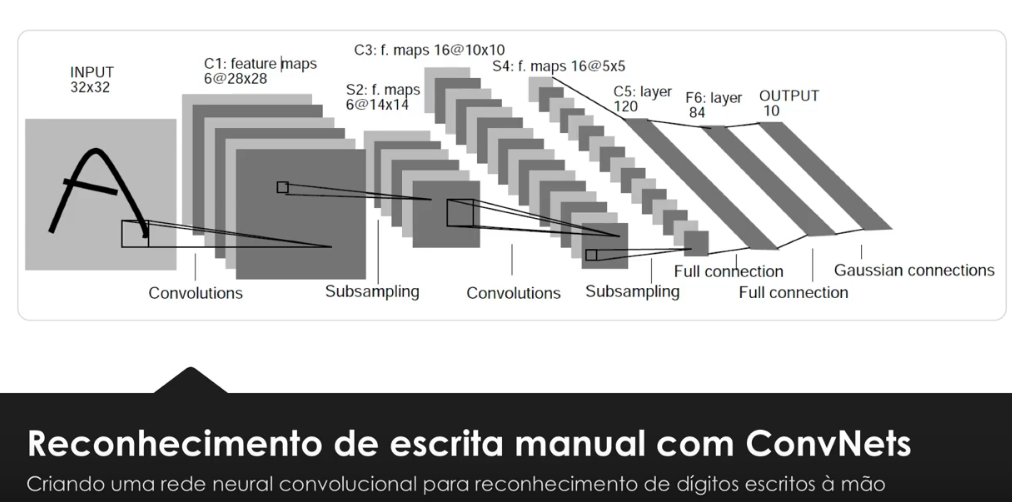

## Aprendizado em redes neurais


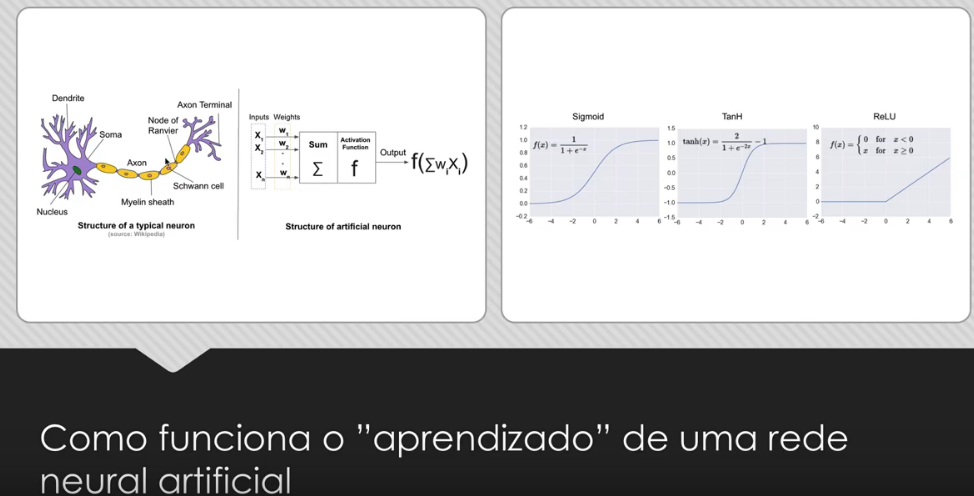

## Neuronio Matemático

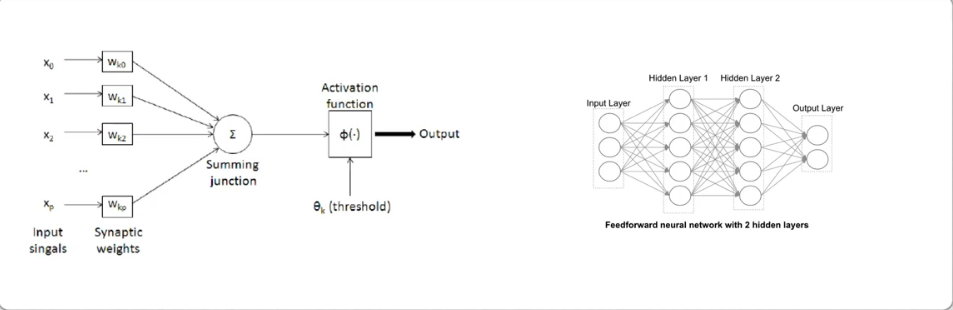

## Função de Erro 

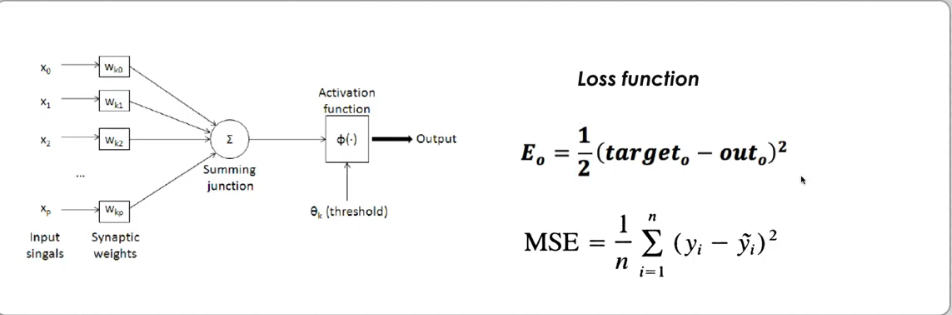

## Retropropogação do erro 

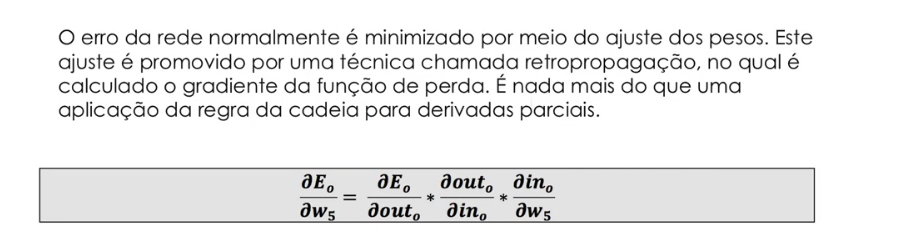

## Introdução a redes neurais convolucionais


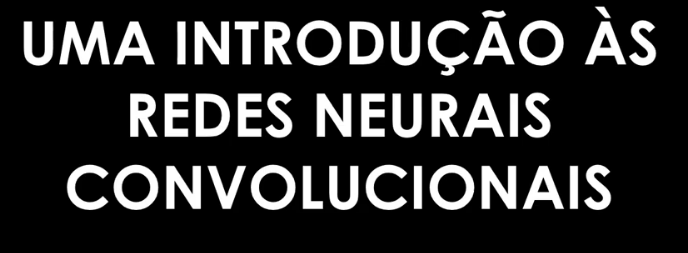

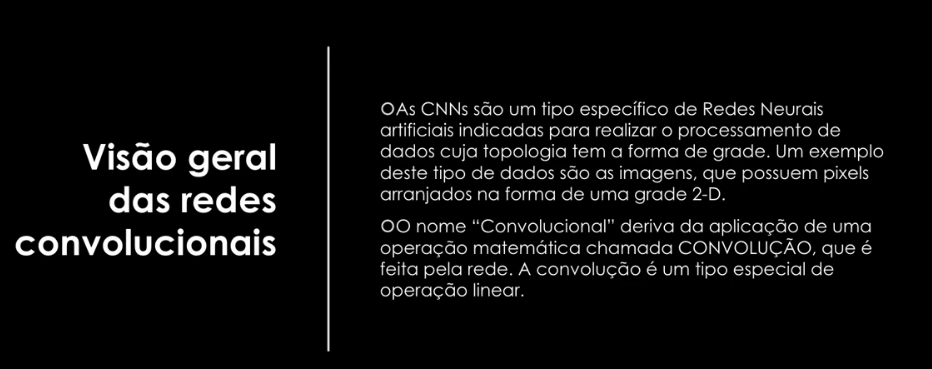

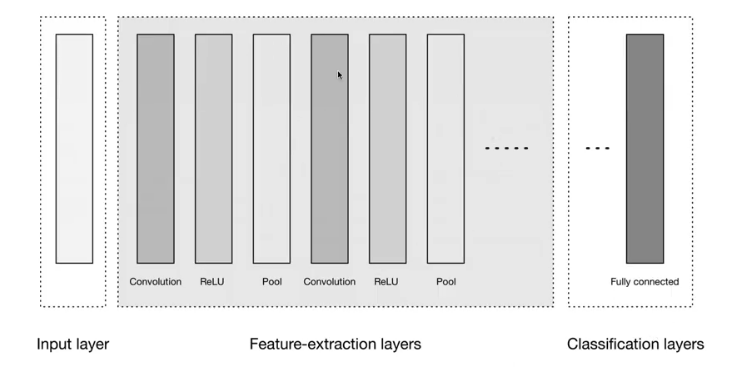

## Como é aplicada a Convolução


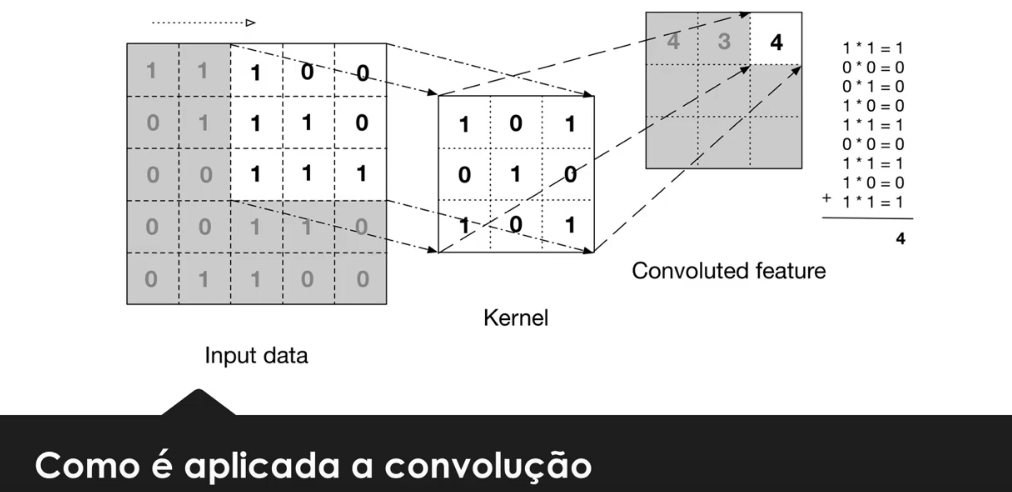

## Filter Map


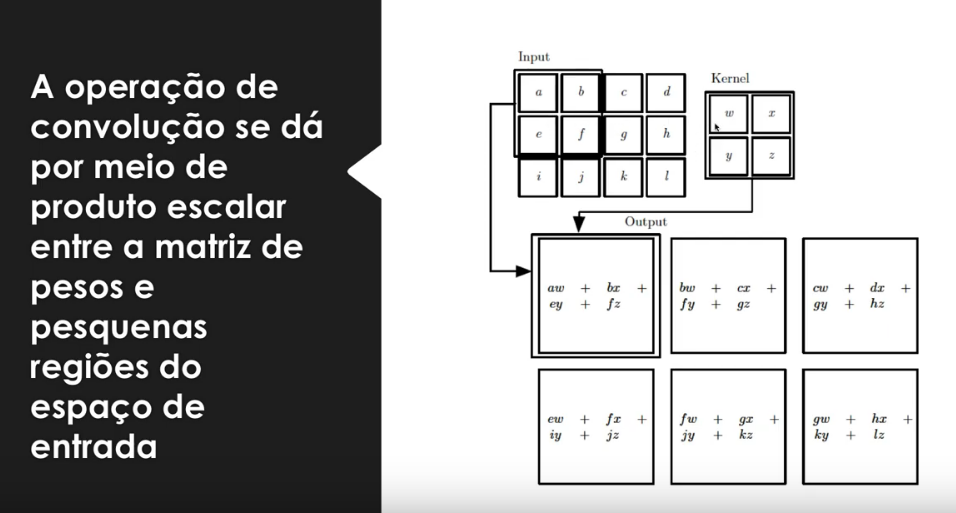

## Operação de Max Polling

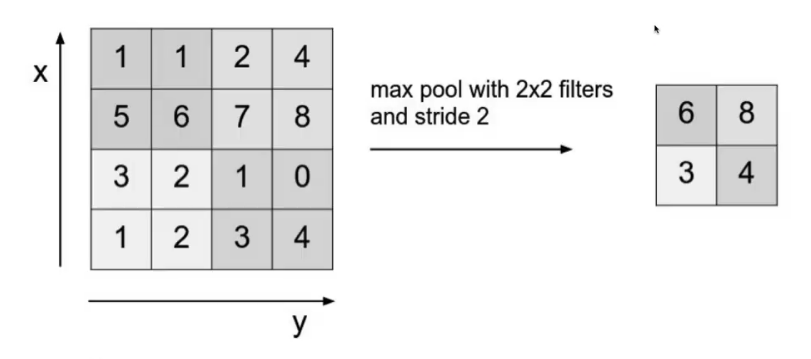

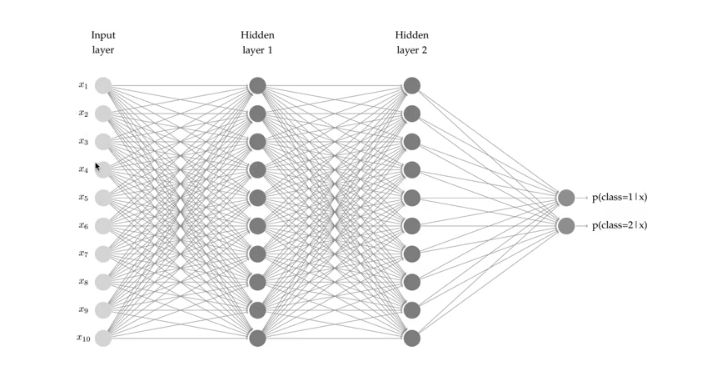

## Intrudução a Programação


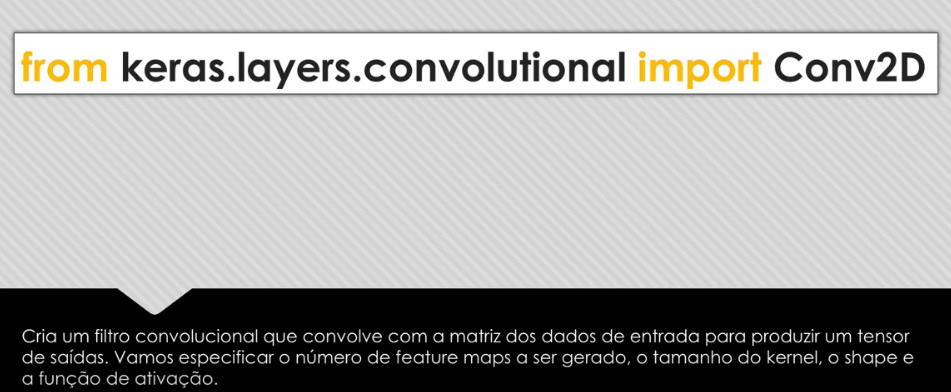

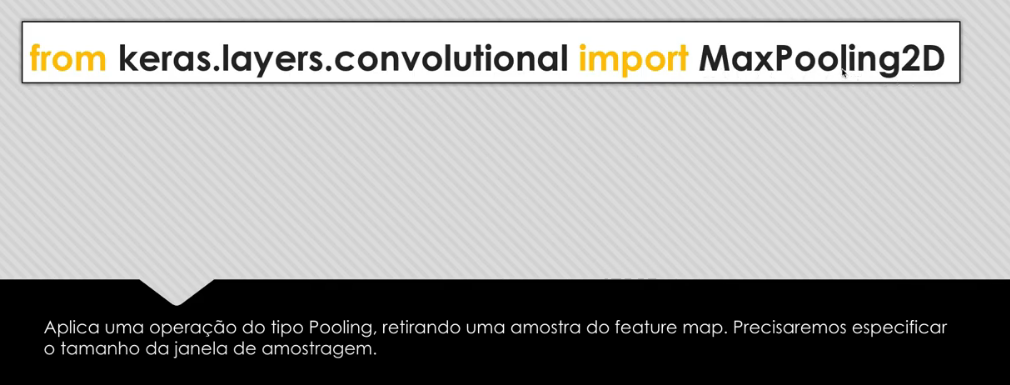

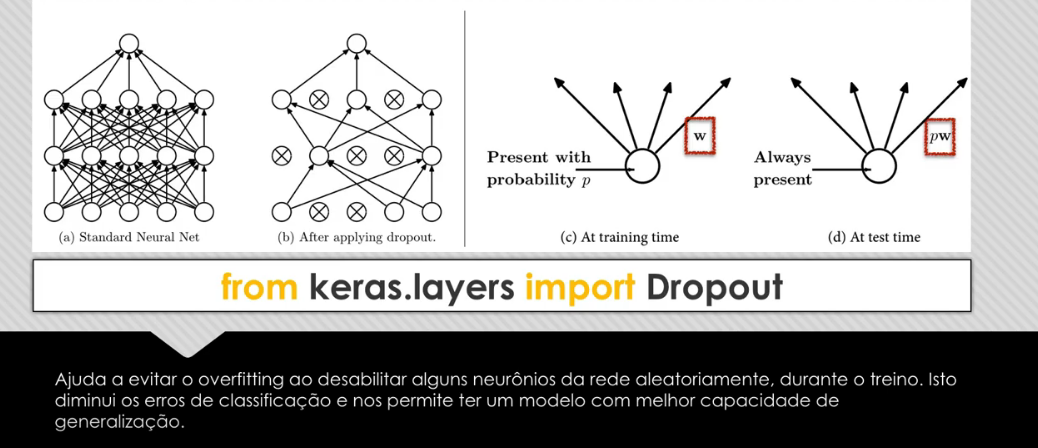

## A operação de Flattem é o calculo da Matrix transposta


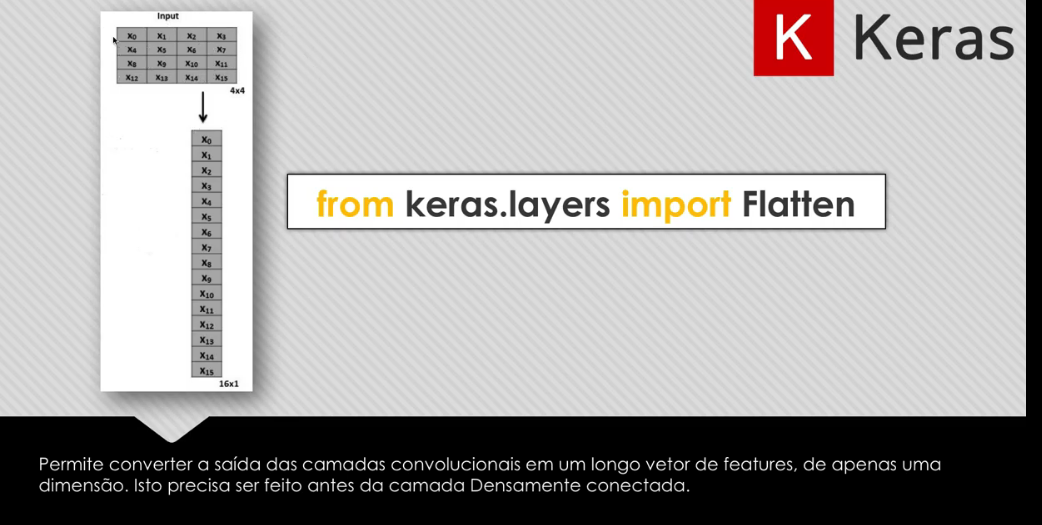

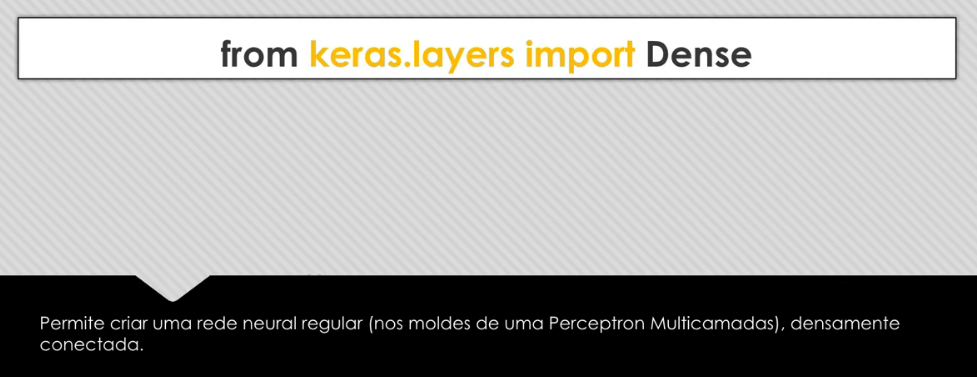

In [0]:
## Arquivo disponivel em 
## https://www.kaggle.com/c/digit-recognizer



In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

data_test = pd.read_csv('/content/drive/My Drive/1.Data Science/Datasets/Mnist/test.csv')
data_train = pd.read_csv('/content/drive/My Drive/1.Data Science/Datasets/Mnist/train.csv')




Error: Jupyter cannot be started. Error attempting to locate jupyter: Data Science libraries notebook and jupyter are not installed in interpreter Python 3.7.4 64-bit ('anaconda3': conda).

In [2]:
import pandas as pd

data_test = pd.read_csv(r'D:\Wesley\VersionCode\AprendendoPython\AprendendoPython\MachineLearning\Datasets\test.csv')
data_train = pd.read_csv(r'D:\Wesley\VersionCode\AprendendoPython\AprendendoPython\MachineLearning\Datasets\train.csv')

In [3]:
data_test.head(2)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data_test.tail(2)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
data_train.head(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
data_test.shape

(28000, 784)

In [0]:
data_train.shape

(42000, 785)

In [0]:
pip install np_utils

## importação das bibliotecas

In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.
ERROR: Could not install packages due to an EnvironmentError: [Errno 2] No such file or directory: 'c:\\users\\wesley.neves\\appdata\\local\\continuum\\anaconda3\\lib\\site-packages\\tensorflow-2.0.0.dist-info\\METADATA'



In [1]:
from keras.datasets import  mnist
from keras import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import  Conv2D
from keras.layers.convolutional import  MaxPooling2D
from keras import losses

import numpy as np
from matplotlib import  pyplot
from keras.utils import np_utils
import cv2
from sklearn.model_selection import train_test_split 
import numpy as np

%matplotlib inline


Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'

In [0]:
from google.colab.patches import cv2_imshow

## Divisão dos dados em Test e Treinamento

In [0]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

## Fazer o reshape 

## fazer o reshape para a seguinte configuração (28, 28, 1)
## matriz de 28 x28 ,no canal 1, ou seja  escala de cinza


In [34]:
x_train = x_train.reshape(x_train.shape[0],28,28,1).astype('float')
x_train.shape

(60000, 28, 28, 1)

In [35]:
x_test = x_test.reshape(x_test.shape[0],28,28,1).astype('float')
x_test.shape

(10000, 28, 28, 1)

## Data Manipulation (Deixar os valores do dataset entre 0 e 1

In [0]:
x_train = x_train / 255
x_test = x_test /255

In [0]:
## converter aos labels me valores multclasses


y_train =  np_utils.to_categorical(y_train)
y_test =  np_utils.to_categorical(y_test)

In [38]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [39]:
y_test[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [40]:
numero_classes = y_test.shape[1]
numero_classes

10

## Estrutura da Rede Neural



paramentros iniciais

In [135]:
quantidade_Filter_maps =30
matrix_filter_maps = (5,5)
percentual_neuronios_desligados = 0.15
quantidade_Neuronios_Camada_Densa_Inicial =255
quantidade_diminuicao =int(quantidade_Neuronios_Camada_Densa_Inicial //  numero_classes)
quantidade_diminuicao




25

In [0]:
rede = Sequential()

rede.add(Conv2D(quantidade_Filter_maps,matrix_filter_maps,input_shape=(28,28,1),activation='relu'))

rede.add(MaxPooling2D(pool_size=(2,2)))

rede.add(Conv2D(15 ,(3,3),input_shape=(28,28,1),activation='relu'))

rede.add(MaxPooling2D(pool_size=(2,2)))

rede.add(Conv2D(10 ,(3,3),input_shape=(28,28,1),activation='relu'))

rede.add(MaxPooling2D(pool_size=(2,2)))

rede.add(Dropout(percentual_neuronios_desligados))

rede.add(Flatten())

## Primeira Camada
rede.add(Dense(quantidade_Neuronios_Camada_Densa_Inicial,activation='relu'))


## Camadas Densas

In [154]:
for interador in range(1,numero_classes):
  quantidade_neuronios = (quantidade_Neuronios_Camada_Densa_Inicial -quantidade_diminuicao *interador)
  rede.add(Dense(quantidade_neuronios,activation='relu'))
  print('Construção de uma camanda densa con %i neuronios' %quantidade_neuronios)



Construção de uma camanda densa con 230 neuronios
Construção de uma camanda densa con 205 neuronios
Construção de uma camanda densa con 180 neuronios
Construção de uma camanda densa con 155 neuronios
Construção de uma camanda densa con 130 neuronios
Construção de uma camanda densa con 105 neuronios
Construção de uma camanda densa con 80 neuronios
Construção de uma camanda densa con 55 neuronios
Construção de uma camanda densa con 30 neuronios


In [0]:
rede.add(Dense(numero_classes,activation='softmax',name='Camanda_Preditora'))
rede.compile(loss=losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])




In [156]:

## Mostra como ficou a arquitetura da rede
rede.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 5, 5, 15)          0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 3, 3, 10)          1360      
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 1, 1, 10)          0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 1, 1, 10)        

In [157]:
## Faz o treinamento do modelo

rede.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=400,batch_size=200)

Train on 60000 samples, validate on 10000 samples
Epoch 1/400
60000/60000 [==============================] - 5s 77us/step - loss: 1.1632 - acc: 0.5800 - val_loss: 0.4889 - val_acc: 0.8471
Epoch 2/400
60000/60000 [==============================] - 3s 51us/step - loss: 0.5407 - acc: 0.8256 - val_loss: 0.3263 - val_acc: 0.9017
Epoch 3/400
60000/60000 [==============================] - 3s 50us/step - loss: 0.3912 - acc: 0.8764 - val_loss: 0.2797 - val_acc: 0.9222
Epoch 4/400
60000/60000 [==============================] - 3s 50us/step - loss: 0.3085 - acc: 0.9026 - val_loss: 0.2144 - val_acc: 0.9404
Epoch 5/400
60000/60000 [==============================] - 3s 49us/step - loss: 0.2723 - acc: 0.9147 - val_loss: 0.2321 - val_acc: 0.9318
Epoch 6/400
60000/60000 [==============================] - 3s 49us/step - loss: 0.2387 - acc: 0.9273 - val_loss: 0.1807 - val_acc: 0.9485
Epoch 7/400
60000/60000 [==============================] - 3s 49us/step - loss: 0.2140 - acc: 0.9356 - val_loss: 0.1990 - 

In [158]:
scores  = rede.evaluate(x_test,y_test,verbose =0)
print('\nAcuracia %.2f%%' %(scores[1] * 100))


Acuracia 98.51%


## Aqui vamos pegar uma amostra nova , sem estar no conjunto de teste.

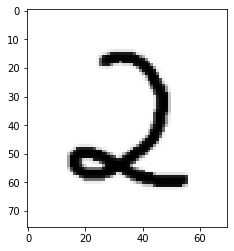

In [159]:
## ler uma nova imagem 

new_image = cv2.imread('/content/drive/My Drive/1.Data Science/Datasets/number-two.png',0)
pyplot.imshow(new_image,cmap='gray')




In [125]:
new_image.shape

(83, 61)

## Caso a imagem esteja em tamanho diferente de 28 x 28 (padrao mniist) faz o resize dela


In [0]:
 if new_image.shape != [28,28]:
   image_resize = cv2.resize(new_image,(28,28))
   image_predicao = image_resize.reshape(28,28,-1)
else:
  image_predicao = new_image.reshape(28,28,-1)
  

image_predicao =image_predicao.reshape(1,28,28,1)
  
    


In [122]:
image_predicao.shape

(1, 28, 28, 1)

## Executando as predições


In [161]:
predicao = rede.predict_classes(image_predicao)
pred_proba = rede.predict_proba(image_predicao)

probalidade = '%.2f%%' %(pred_proba[0][predicao] * 100)

print(predicao[0] ,' com probabilidade de',probalidade)

8  com probabilidade de 100.00%
